# Telco Customer Churn prediction using Python


# Import Libraries

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt






# Load Dataset

In [12]:
df = pd.read_csv(r"C:\Users\meghn\OneDrive\Desktop\Jupyter\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##  Data Preprocessing
We will:
- Drop the customerID column
- Handle missing values
- Convert TotalCharges to float
- Encode all categorical features

In [18]:
if 'customerID' in df.columns:
    df.drop(['customerID'], axis=1, inplace=True)

df.replace(" ", np.nan, inplace=True)
df.dropna(inplace=True)
df['TotalCharges'] = df['TotalCharges'].astype(float)


for col in df.select_dtypes(include='object').columns:
    df[col], _ = pd.factorize(df[col])

## Visualize Churn Distribution
We will use a bar plot to see how many customers have churned vs stayed.


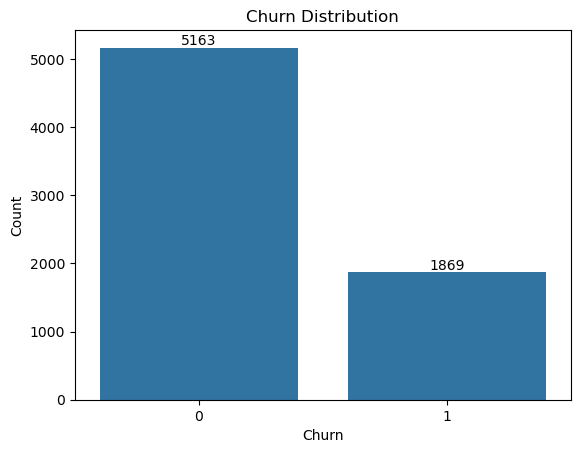

In [19]:
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')

# Add value labels on top of bars
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width()/2, p.get_height(), int(p.get_height()), 
             ha='center', va='bottom', fontsize=10)

plt.show()

## Feature Relationship Analysis
correlation heatmap to understand how features like tenure, contract type, monthly charges, and services relate to each other and to customer churn. Strong relationships can highlight key drivers of behavior, which is helpful for business decisions.

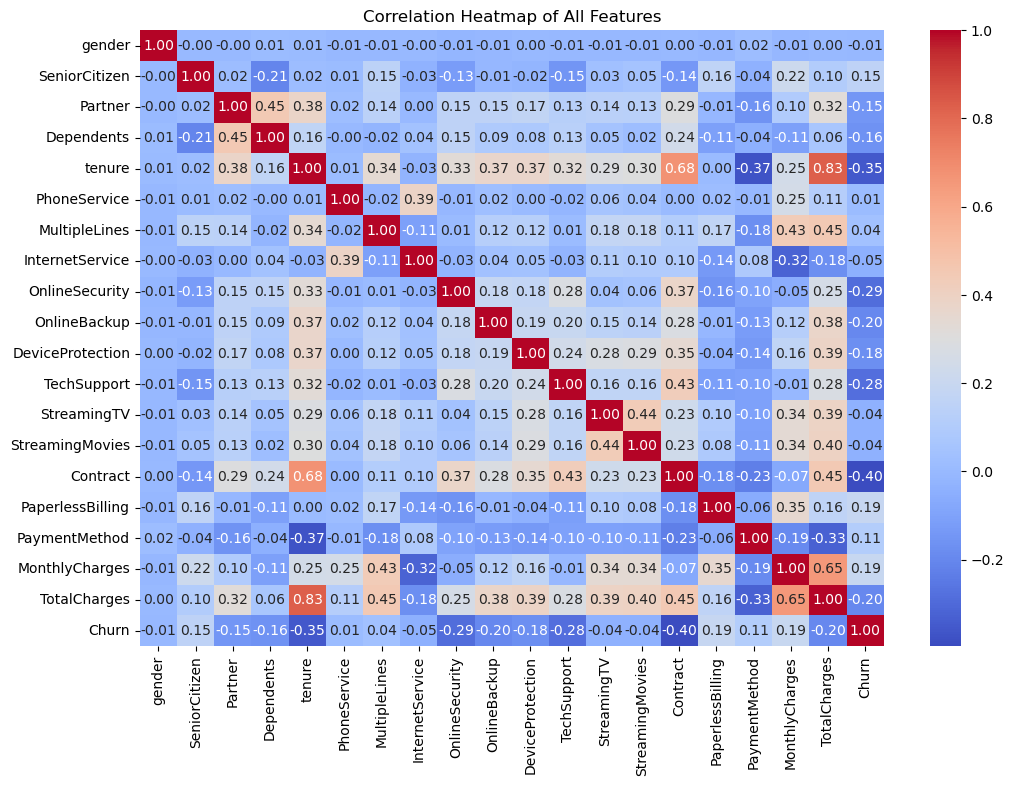

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of All Features')
plt.show()

## Customer Tenure Segmentation
We analyze how long customers have been with the company and how tenure relates to churn risk.

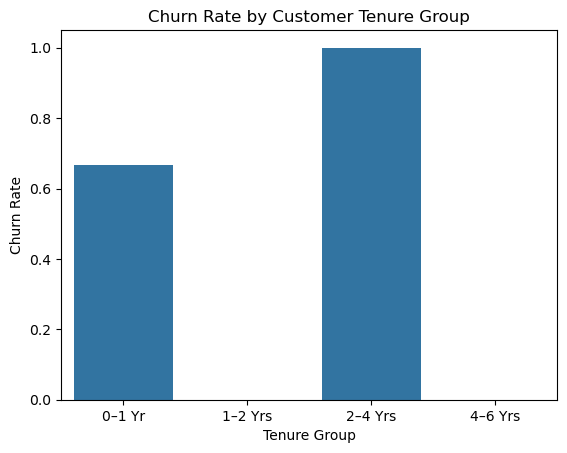

In [7]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'tenure': [1, 5, 15, 30, 50, 70, 10, 20, 40, 60],
    'Churn': [1, 0, 0, 1, 0, 0, 1, 0, 1, 0]
})


df['TenureGroup'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 72], labels=['0–1 Yr', '1–2 Yrs', '2–4 Yrs', '4–6 Yrs'])

tenure_churn = df.groupby('TenureGroup', observed=True)['Churn'].mean().reset_index()

sns.barplot(data=tenure_churn, x='TenureGroup', y='Churn')
plt.title('Churn Rate by Customer Tenure Group')
plt.ylabel('Churn Rate')
plt.xlabel('Tenure Group')
plt.show()


## Impact of Services on Churn

In [21]:
service_features = ["TechSupport", "OnlineSecurity", "StreamingTV"]

for feature in service_features:
    if feature in df.columns:
        churn_by_service = df.groupby(feature)['Churn'].mean()
        print(f"\nChurn Rate by {feature}:\n{churn_by_service}")
    else:
        print(f"{feature} not found in DataFrame")



Churn Rate by TechSupport:
TechSupport
0    0.416475
1    0.151961
2    0.074342
Name: Churn, dtype: float64

Churn Rate by OnlineSecurity:
OnlineSecurity
0    0.417787
1    0.146402
2    0.074342
Name: Churn, dtype: float64

Churn Rate by StreamingTV:
StreamingTV
0    0.335351
1    0.301147
2    0.074342
Name: Churn, dtype: float64


## Business Insights from EDA

In [28]:
# Churn % by Contract Type
contract_churn = df.groupby("Contract")["Churn"].mean().reset_index()
print("Average churn rate by contract type:\n", contract_churn)

# Churn % by Monthly Charges
high_charges = df[df['MonthlyCharges'] > df['MonthlyCharges'].median()]
low_charges = df[df['MonthlyCharges'] <= df['MonthlyCharges'].median()]

print("\nChurn rate for high-paying customers:", high_charges['Churn'].mean())
print("Churn rate for low-paying customers:", low_charges['Churn'].mean())

Average churn rate by contract type:
    Contract     Churn
0         0  0.427097
1         1  0.112772
2         2  0.028487

Churn rate for high-paying customers: 0.3521206945630515
Churn rate for low-paying customers: 0.17959647627166808


##  Key Takeaways and Business Recommendations from Correlation Analysis



After analyzing the correlation heatmap, here are some important patterns we noticed — and what they could mean for the business:

- Customers who pay *higher monthly charges* are a bit more likely to leave.  
  This suggests that pricing could be a concern. Offering flexible or personalized pricing plans might help keep them from switching to competitors.

- Customers who *use technical support* tend to stay longer.  
  This shows how valuable good customer service really is. Making support more visible and available — especially early on — could improve satisfaction and retention.

-  People who have services like *StreamingTV* or *StreamingMovies* show a slightly higher tendency to churn.  
  These services on their own might not be enough to hold onto customers. It might help to bundle them with other features or benefits that add more value.

-  New customers — especially those who’ve been with the company for *less than a year* — are more likely to leave.  
  This is a great opportunity to focus on making a strong first impression. A smooth onboarding, quick wins, and personalized follow-ups could go a long way.

- Customers with *long-term contracts* tend to stay much longer.  
  Encouraging people to move to 6-month or annual plans through rewards or small discounts could significantly reduce churn.

-  Those who use *electronic billing* show a slight increase in churn.  
  Since these customers might not interact with the brand often, it could help to use those billing touchpoints to send helpful updates, check-ins, or special offers.